<a href="https://colab.research.google.com/github/Tanu-N-Prabhu/Python/blob/master/Machine%20Learning%20Interview%20Prep%20Questions/Unsupervised%20Learning%20Algorithms/Dimensionality%20Reduction/pca_from_scratch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Principal Component Analysis (PCA) from Scratch (No ML Libraries, No Classes)

This notebook walks you through a step-by-step implementation of **Principal Component Analysis (PCA)** using only NumPy.

PCA is a widely used dimensionality reduction technique in machine learning and data science. It reduces the number of input features while preserving the maximum possible variance in the data.

## What is PCA?

PCA transforms high-dimensional data into a smaller-dimensional space by identifying the directions (called **principal components**) where the data varies the most.

### Key Concepts:
- **Variance**: How spread out the data is
- **Eigenvectors**: Directions of maximum variance
- **Eigenvalues**: How much variance is captured in those directions
- **Dimensionality Reduction**: Keep only top `k` components (e.g., 2D or 3D)

PCA is **unsupervised** and often used for:
- Visualization
- Noise reduction
- Feature extraction before ML modeling

## Generate Sample Data

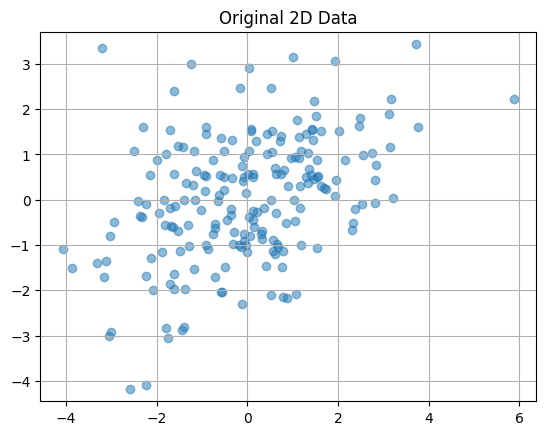

In [1]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(42)

# Create synthetic 2D data
X = np.random.multivariate_normal([0, 0], [[3, 1], [1, 2]], 200)

plt.scatter(X[:, 0], X[:, 1], alpha=0.5)
plt.title("Original 2D Data")
plt.axis('equal')
plt.grid(True)
plt.show()


## PCA Implementation Steps

In [2]:
# Step 1: Standardize the data (zero mean)
X_meaned = X - np.mean(X, axis=0)

# Step 2: Calculate the covariance matrix
cov_mat = np.cov(X_meaned.T)

# Step 3: Compute eigenvalues and eigenvectors
eigen_vals, eigen_vecs = np.linalg.eig(cov_mat)

# Step 4: Sort eigenvectors by eigenvalues (descending)
sorted_idx = np.argsort(eigen_vals)[::-1]
eigen_vals = eigen_vals[sorted_idx]
eigen_vecs = eigen_vecs[:, sorted_idx]

# Step 5: Select top k eigenvectors (e.g., k = 1 or 2)
k = 1
selected_vecs = eigen_vecs[:, :k]

# Step 6: Project the data onto the new subspace
X_reduced = X_meaned @ selected_vecs


## Visualize PCA Transformation

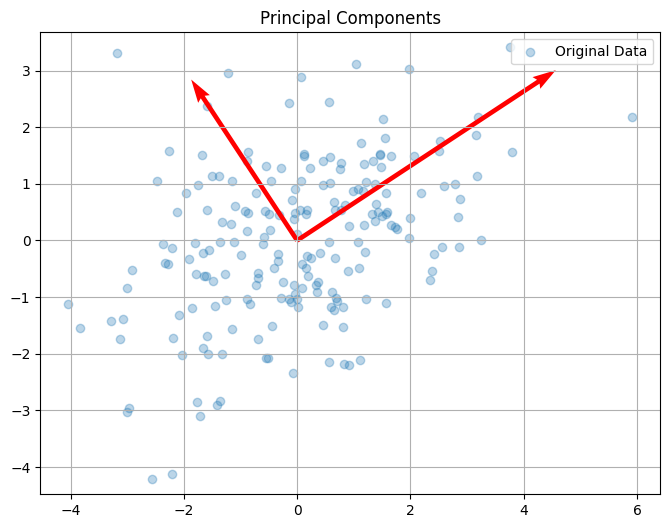

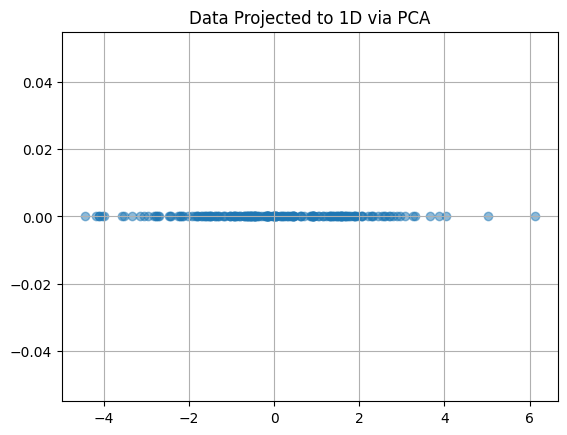

In [3]:
# Visualize the first principal component
plt.figure(figsize=(8, 6))
plt.scatter(X_meaned[:, 0], X_meaned[:, 1], alpha=0.3, label="Original Data")
for length, vector in zip(eigen_vals, eigen_vecs.T):
    v = vector * 3 * np.sqrt(length)
    plt.quiver(0, 0, v[0], v[1], angles='xy', scale_units='xy', scale=1, color='r')

plt.title("Principal Components")
plt.axis('equal')
plt.grid(True)
plt.legend()
plt.show()

# Visualize reduced data (1D)
plt.scatter(X_reduced, np.zeros_like(X_reduced), alpha=0.5)
plt.title("Data Projected to 1D via PCA")
plt.grid(True)
plt.show()

## Summary

- PCA helps reduce dimensions while preserving variance
- We used NumPy to compute:
  - Mean-centered data
  - Covariance matrix
  - Eigen decomposition
  - Projection onto principal components
- PCA can be used for:
  - Feature compression
  - Visualization (2D/3D)
  - Speeding up ML models
